### Librerías a utilizar

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

## 1) Información general del dataset

In [68]:
df = pd.read_csv(r"C:\Users\nico_\Proyectos Jupyter\BreastCancerData.csv")

In [70]:

df["diagnosis"]=df["diagnosis"].map({'M': 1, 'B': 0}) #Mapeo M y B a 1 y 0
df = df.drop(columns=["Unnamed: 32","id"])
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### 1.1) Tipos de datos de los features

In [73]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

## 2) Análisis de Datos Exploratorio (EDA)

### 2.1) Valores faltantes

In [77]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print("Columna: ")
    print(missing_data[column].value_counts())
    print("")


Columna: 
diagnosis
False    569
Name: count, dtype: int64

Columna: 
radius_mean
False    569
Name: count, dtype: int64

Columna: 
texture_mean
False    569
Name: count, dtype: int64

Columna: 
perimeter_mean
False    569
Name: count, dtype: int64

Columna: 
area_mean
False    569
Name: count, dtype: int64

Columna: 
smoothness_mean
False    569
Name: count, dtype: int64

Columna: 
compactness_mean
False    569
Name: count, dtype: int64

Columna: 
concavity_mean
False    569
Name: count, dtype: int64

Columna: 
concave points_mean
False    569
Name: count, dtype: int64

Columna: 
symmetry_mean
False    569
Name: count, dtype: int64

Columna: 
fractal_dimension_mean
False    569
Name: count, dtype: int64

Columna: 
radius_se
False    569
Name: count, dtype: int64

Columna: 
texture_se
False    569
Name: count, dtype: int64

Columna: 
perimeter_se
False    569
Name: count, dtype: int64

Columna: 
area_se
False    569
Name: count, dtype: int64

Columna: 
smoothness_se
False    569
Name: 

In [13]:
counts = df["diagnosis"].value_counts()
print(f"Cantidad de 0 (Benigno): {counts[0]}")
print(f"Cantidad de 1 (Maligno): {counts[1]}")

Cantidad de 0 (Benigno): 357
Cantidad de 1 (Maligno): 212


### 2.2) Correlación con variable Diagnosis

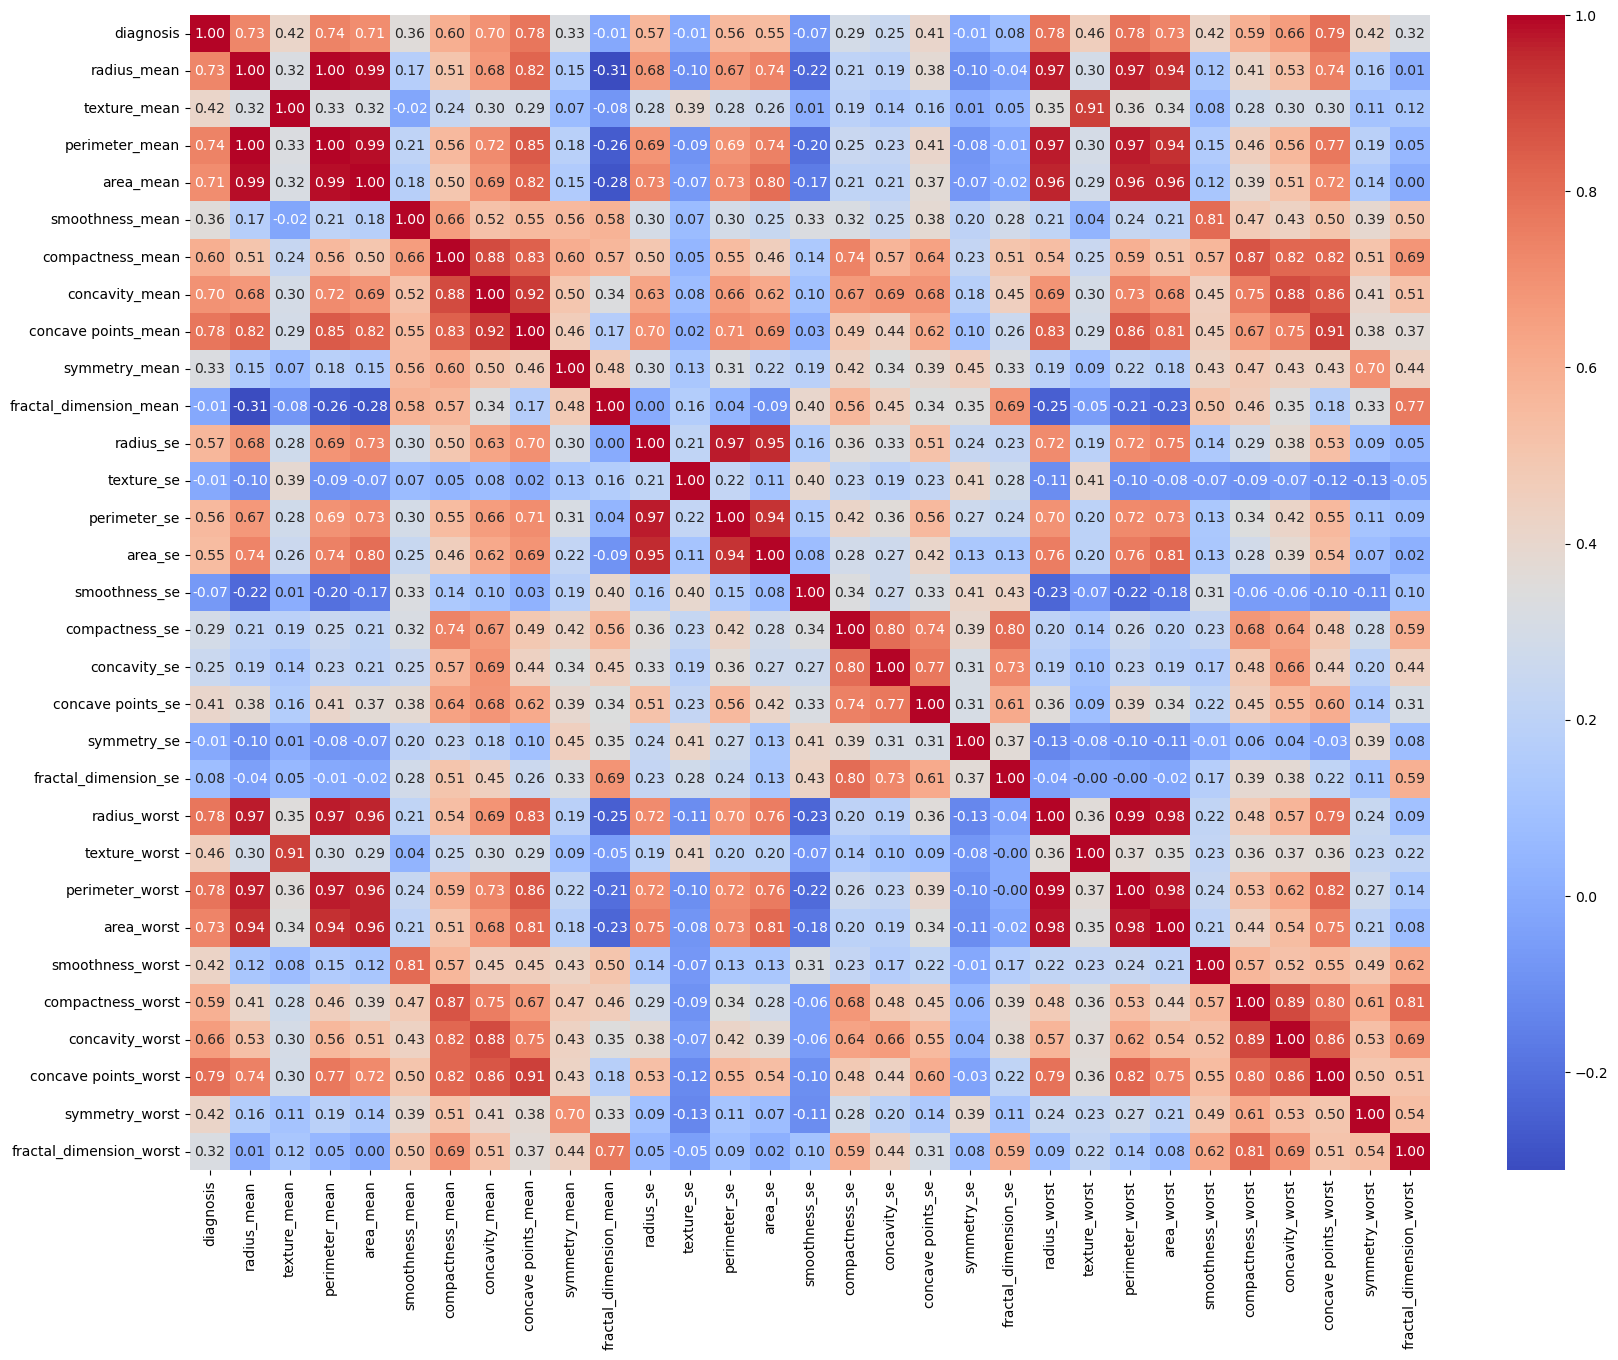

In [15]:

corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [33]:

# Calcular la correlación de las variables con 'diagnosis'
correlations = df.corr()["diagnosis"].drop("diagnosis").sort_values(ascending=False)

# Mostrar los valores de correlación
print("VARIABLE:\n\n",correlations)

VARIABLE:

 concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
area_worst                 0.733825
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_worst          0.590998
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
fractal_dimension_se       0.077972
Name: diagnosis, dtype: float64


### 2.3.1) Diagramas Pairplot: variables MEAN

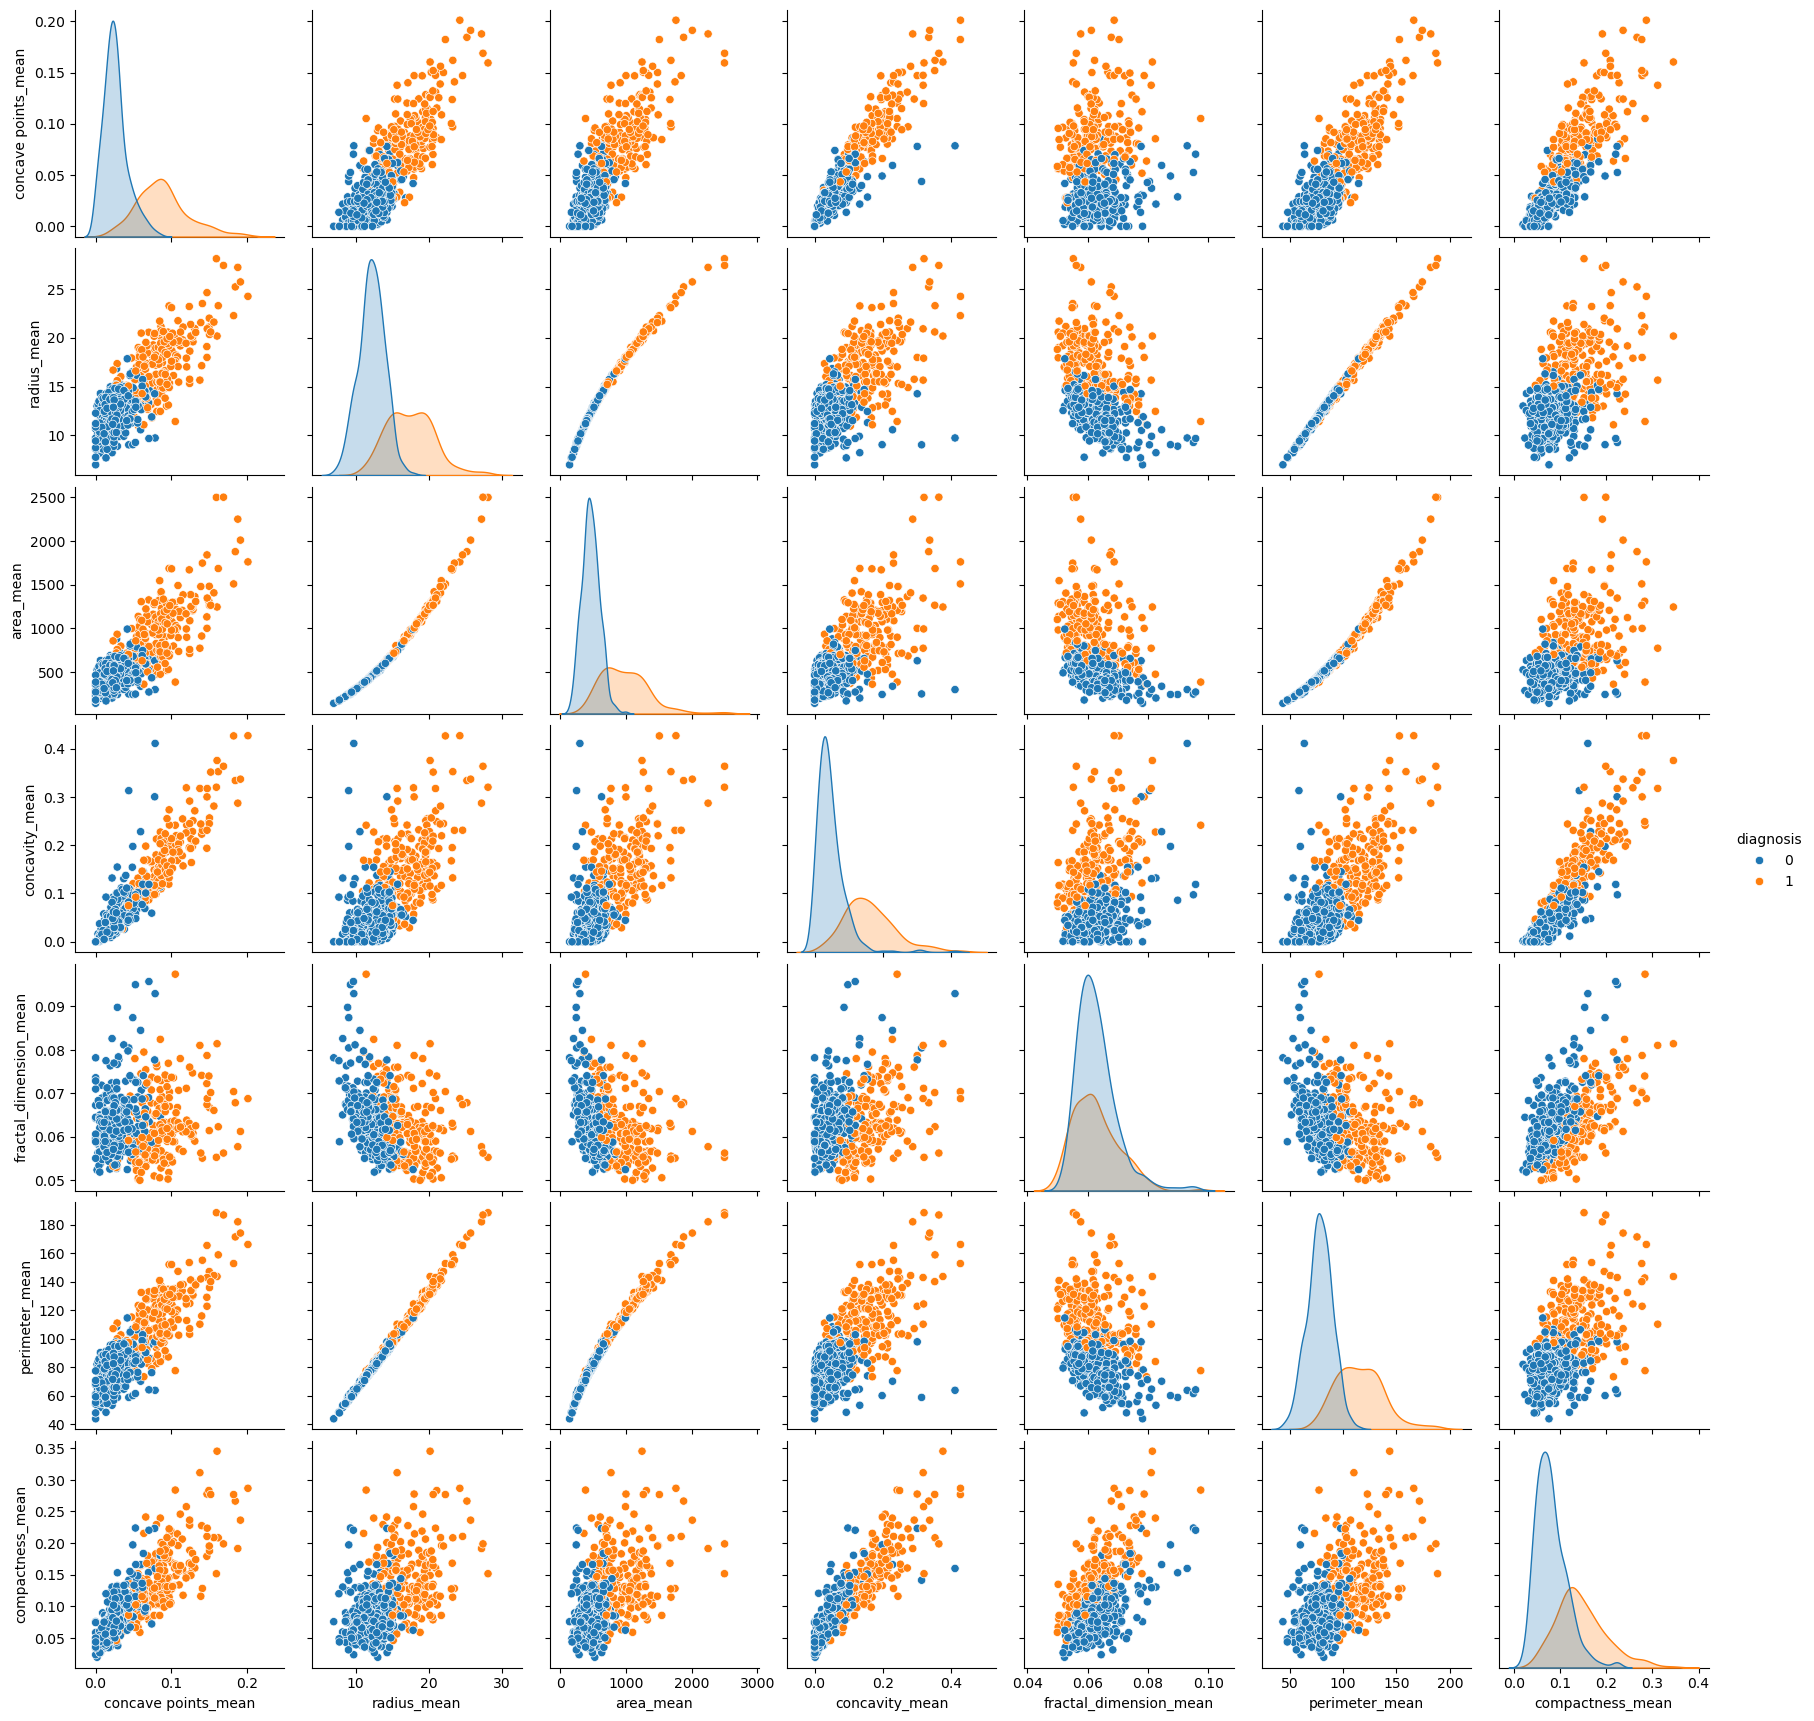

In [952]:

variables_mean = ["concave points_mean", "radius_mean", "area_mean", 
                  "concavity_mean", "fractal_dimension_mean", "perimeter_mean",  
                  "compactness_mean","diagnosis"]

# Crear pairplot para ver correlaciones visualmente
#sns.pairplot(df[variables_mean], hue="diagnosis")
sns.pairplot(df[variables_mean], hue="diagnosis")
plt.show()


### 2.3.2) Diagramas Pairplot: variables WORST

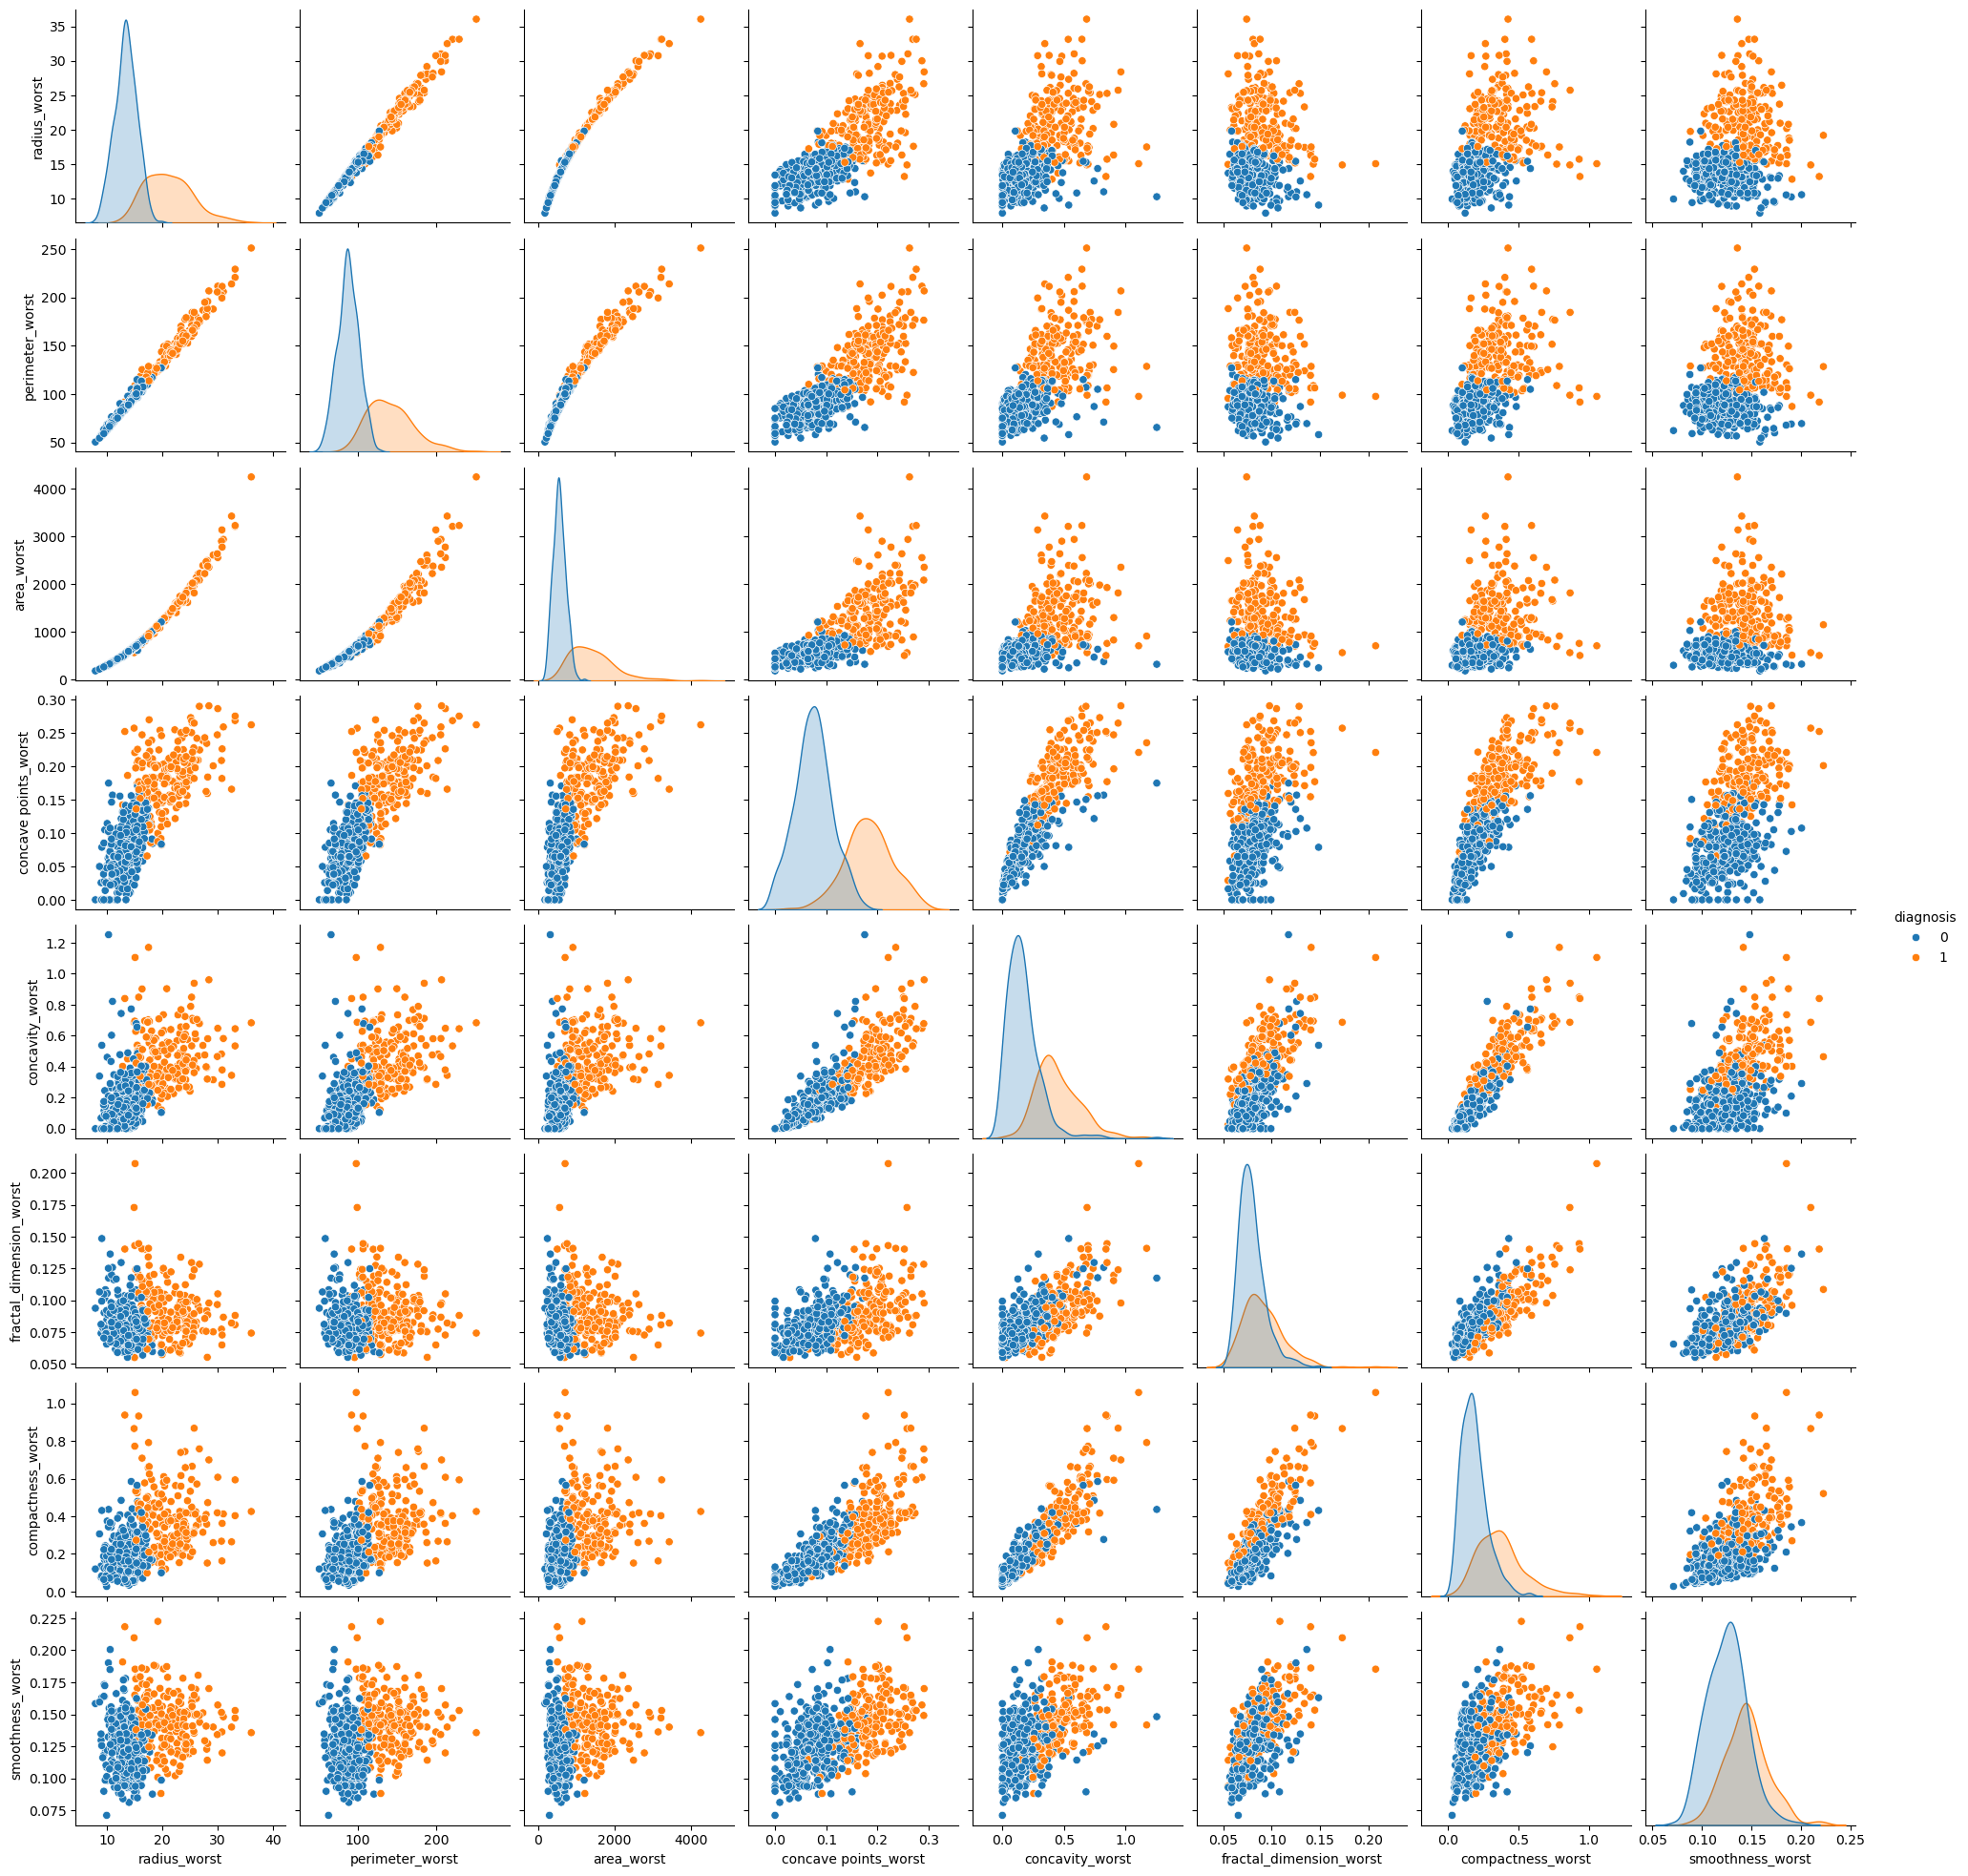

In [734]:
variables_worst = ["radius_worst","perimeter_worst","area_worst", "concave points_worst",
             "concavity_worst", "fractal_dimension_worst", "compactness_worst","smoothness_worst","diagnosis"]

sns.pairplot(df[variables_worst], hue="diagnosis")
plt.show()

### 2.3.3) Diagramas Pairplot: variables SE

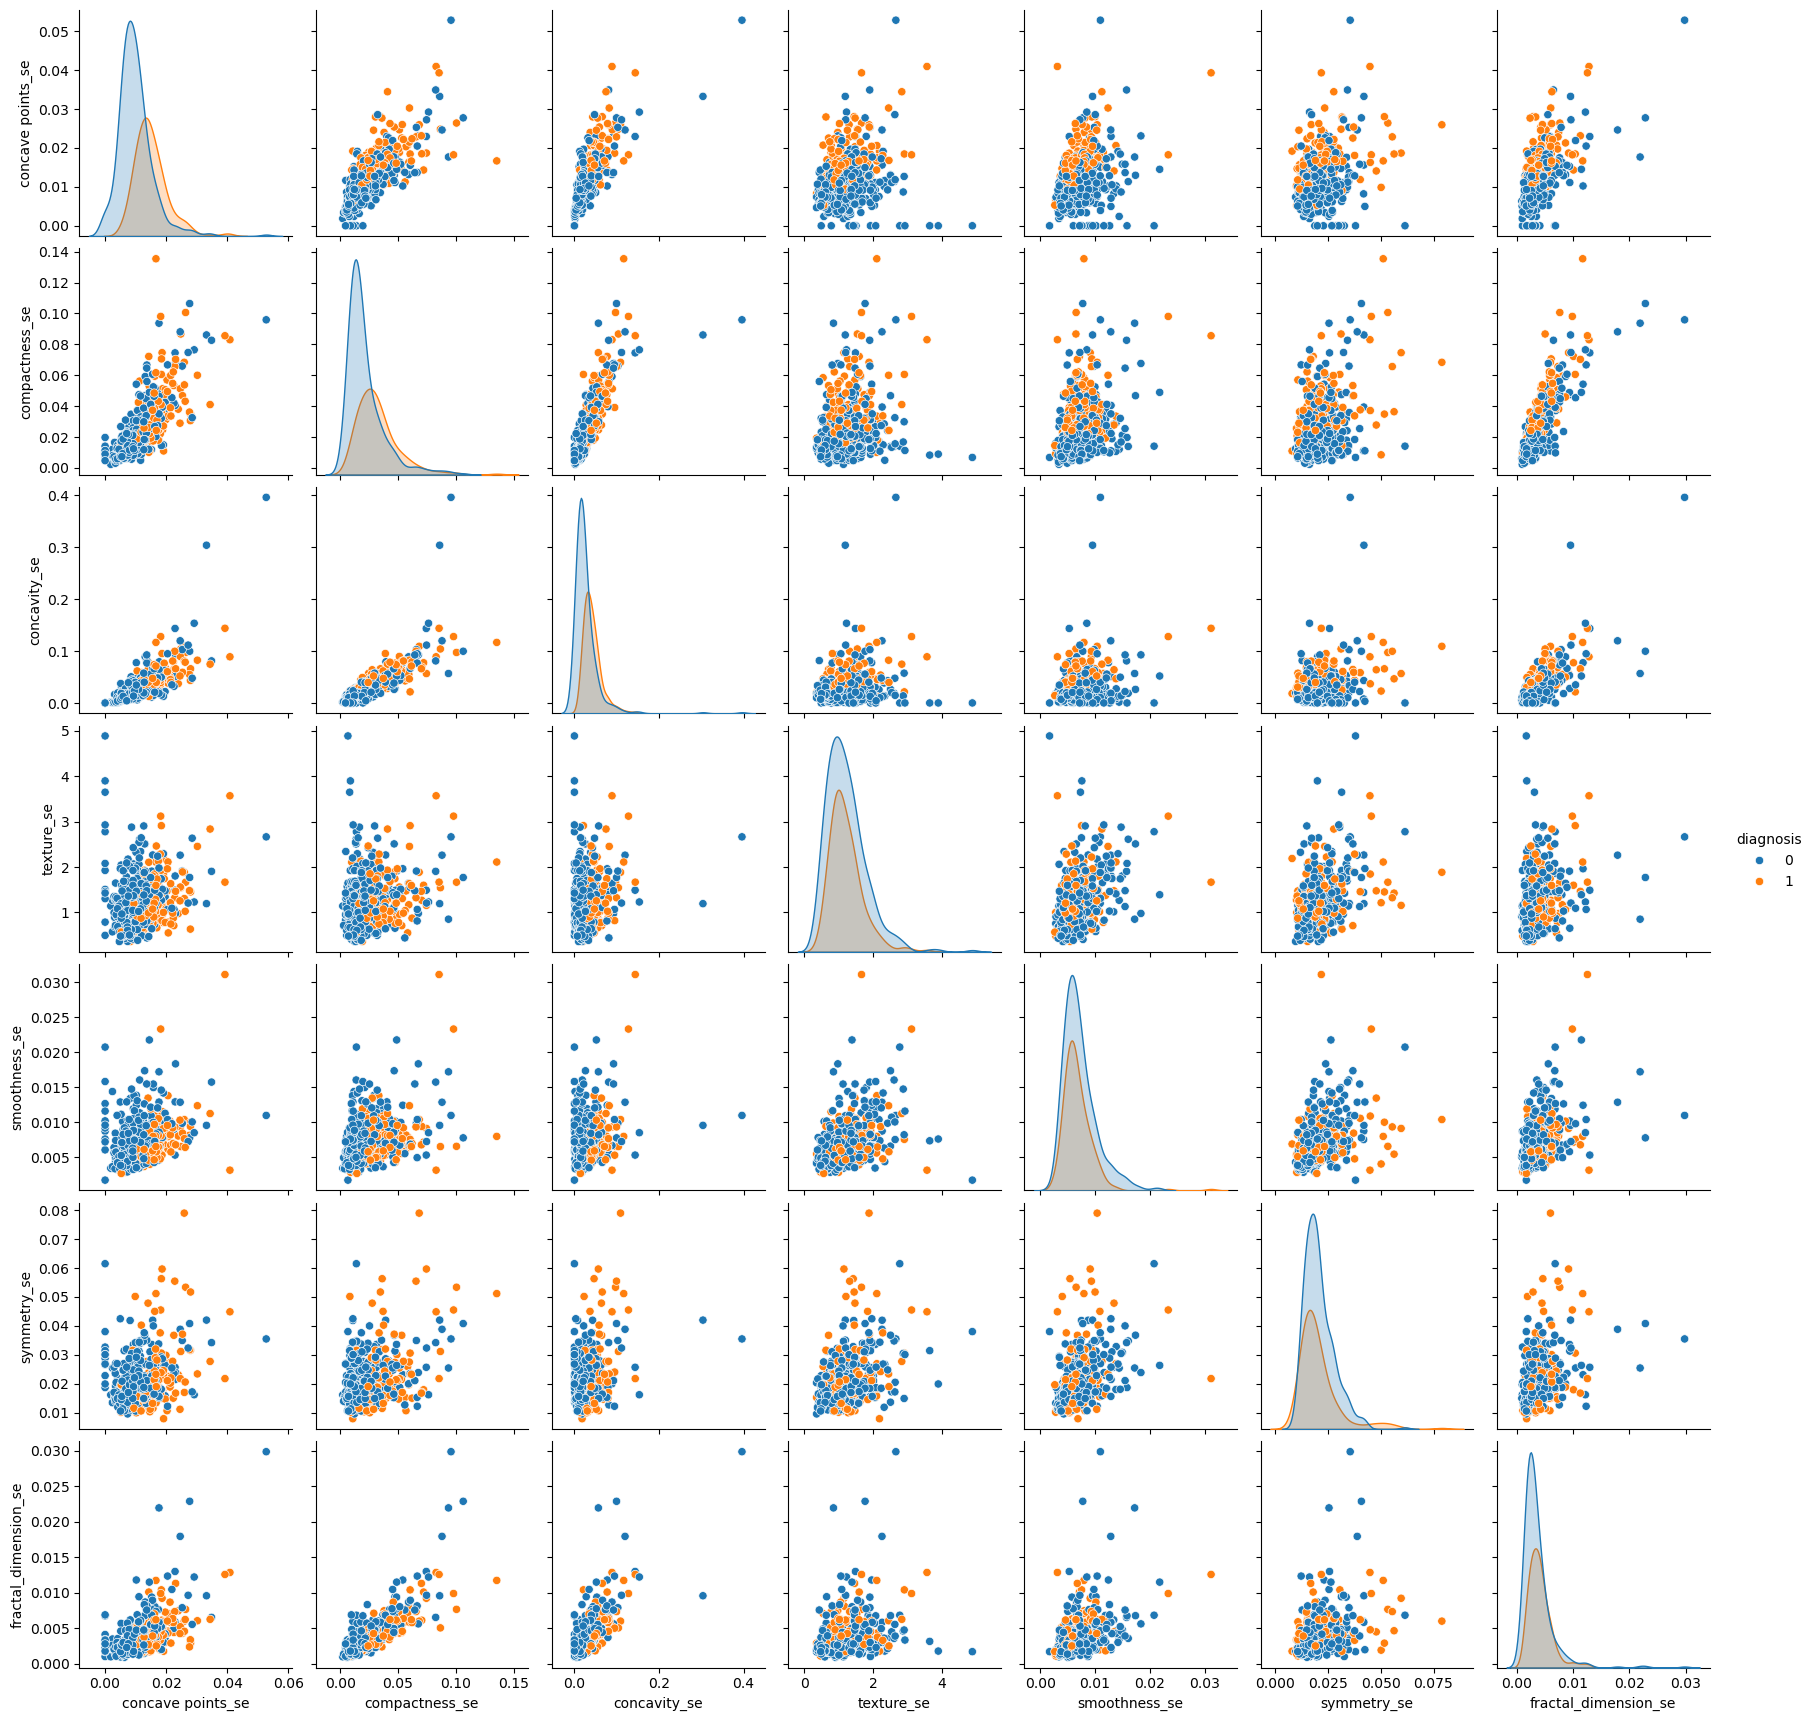

In [584]:
variables_se = ["concave points_se",
              "compactness_se","concavity_se","texture_se","smoothness_se","symmetry_se","fractal_dimension_se","diagnosis"]

sns.pairplot(df[variables_se], hue="diagnosis")
plt.show()

### Lista de variables MEAN con mayor overlaping
1)Fractal dimension_mean

### Lista de variables WORST con mayor overlaping
1) fractal_dimension_worst
2) Smoothness_worst

### Lista de variables SE con mayor overlaping
1) texture_se
2) smoothness_se
3) symmetry_se
4) compactness_se
5) concavity_se
6) concave points_se
7) fractal_dimension_se


### 2.4) Valor correlación entre variables con mayor overlapping y <code> Diagnóstico </code>

In [79]:

variables_mean = ["fractal_dimension_mean"]
variables_worst = ["fractal_dimension_worst", "smoothness_worst"]
variables_se = ["texture_se", "smoothness_se", "symmetry_se", "compactness_se", "concavity_se", "concave points_se","fractal_dimension_se"]

# Unir todas las vAriables en orden
variables = variables_mean + variables_worst + variables_se
correlaciones = {}

for var in variables:
    correlacion = df[var].corr(df["diagnosis"])
    correlaciones[var] = correlacion  

# Ordenar de mayor a menos
correlaciones_ordenadas = dict(sorted(correlaciones.items(), key=lambda item: item[1], reverse=True))

print("\nCorrelaciones ordenadas de mayor a menor de las variables con mayor overlapping:")
for i, (var, corr) in enumerate(correlaciones_ordenadas.items(), start=1):
    print(f"{i}. {var}: {corr:.2f}")




Correlaciones ordenadas de mayor a menor de las variables con mayor overlapping:
1. smoothness_worst: 0.42
2. concave points_se: 0.41
3. fractal_dimension_worst: 0.32
4. compactness_se: 0.29
5. concavity_se: 0.25
6. fractal_dimension_se: 0.08
7. symmetry_se: -0.01
8. texture_se: -0.01
9. fractal_dimension_mean: -0.01
10. smoothness_se: -0.07


## 3) Preprocesamiento de datos

### 3.1) Eliminar features

In [81]:
# Eliminar las variables tras análisis
df = df.drop(columns=["radius_worst","perimeter_mean","radius_mean","compactness_mean","fractal_dimension_mean",
                      "concavity_se","compactness_se","texture_se",
                      "symmetry_se","radius_se","perimeter_se","area_se","smoothness_se"])

### 3.2) Normalizar datos

In [84]:
# Normalizar datos
X = df.drop(columns=["diagnosis"])
Y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.3) Encontrar el mejor Test size

In [87]:

# Tamaños de test set
test_sizes = [0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
best_score = 0
best_size = 0

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=size, random_state=42)
    model = SVC(kernel='linear', C=1)  # SVM con kernel lineal
    scores = cross_val_score(model, X_train, y_train, cv=5)  # Validación cruzada
    mean_score = scores.mean()
    print(f"Test size: {size}, Accuracy: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_size = size

# Entrenar modelo con el mejor test size
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=best_size, random_state=42)

print(f"\nMejor test size: {best_size}")


Test size: 0.1, Accuracy: 0.9707
Test size: 0.15, Accuracy: 0.9689
Test size: 0.2, Accuracy: 0.9692
Test size: 0.3, Accuracy: 0.9724
Test size: 0.4, Accuracy: 0.9736
Test size: 0.5, Accuracy: 0.9683

Mejor test size: 0.4


### 3.4) Usar GridSearchCV con validación cruzada para encontrar hiperparámetros

In [89]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definir hiperparámetros correctamente
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},  # Sin gamma
    {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly'], 'gamma': [0.001, 0.01, 0.1, 1,10,100,1000]}  # Con gamma
]

# Modelo base con random_state
svm = SVC(random_state=42)


# Estrategia de validación cruzada
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV con múltiples configuraciones
grid_search = GridSearchCV(svm, param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1, pre_dispatch='2*n_jobs')

# Dividir los datos en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Ajustar GridSearchCV
grid_search.fit(X_train2, y_train2)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

mejorC = best_params['C']
mejorK = best_params['kernel']
mejorG = best_params.get('gamma', 'No aplica')

print(f"\n🔹 [GridSearchCV] Mejor C: {best_params['C']}")
print(f"🔹 [GridSearchCV] Mejor gamma: {best_params.get('gamma', 'No aplica')}")
print(f"🔹 [GridSearchCV] Mejor kernel: {best_params['kernel']}")
print(f"🔹 [GridSearchCV] Mejor precisión: {best_score:.4f}")

# Mostrar tabla de resultados
results_df = pd.DataFrame(grid_search.cv_results_)



🔹 [GridSearchCV] Mejor C: 1
🔹 [GridSearchCV] Mejor gamma: No aplica
🔹 [GridSearchCV] Mejor kernel: linear
🔹 [GridSearchCV] Mejor precisión: 0.9759


### 3.5) Aplicación del modelo SVM

In [110]:
if isinstance(mejorG, (int, float)):
    model = SVC(kernel=mejorK, C=mejorC, gamma=mejorG) 
    # Ejecutar modelo relacionado con gamma aquí
else:
    model = SVC(kernel=mejorK, C=mejorC) 
      # Modelo linear, sin gamma

#model = SVC(kernel='linear', C=1) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
final_accuracy2 = accuracy_score(y_test, y_pred)

## 4) Evaluación y desempeño

### 4.1) Precisión

In [112]:
print(f"Precisión Final: {final_accuracy2*100:.2f}%")

Precisión Final: 98.68%


### 4.2) Classification Report

In [102]:
from sklearn.metrics import classification_report
from IPython.display import display, Markdown

# Generar el reporte como diccionario
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Mostrar tabla
display(Markdown("## 🔹 Classification Report 🔹"))
display(df_report.style.background_gradient(cmap="Blues").format("{:.2f}"))

## 🔹 Classification Report 🔹

### 4.3) Confusion Matrix

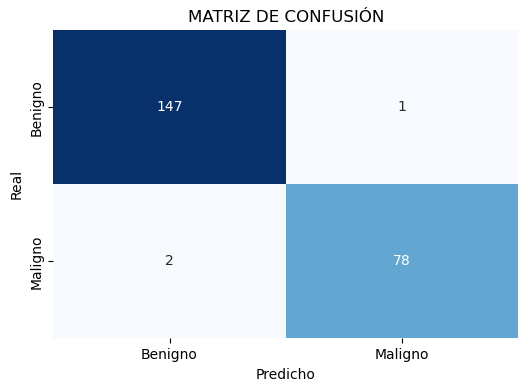

In [104]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Benigno", "Maligno"], yticklabels=["Benigno", "Maligno"])

plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show()
#print(y_test[0:20])
#print(y_pred[0:20])